In [13]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
!ls "drive/My Drive/Mivia_Processed_Data"

glass  gunshots  screams  unknown


In [0]:
!ls "drive/My Drive/Mivia_Processed_Data/unknown" | wc -l

1538


In [0]:
!pip install librosa tensorflow-gpu keras kapre tqdm

In [14]:
import tensorflow as tf
print("tf version: ", tf.__version__)

tf version:  1.14.0


In [16]:
import numpy as np
import matplotlib.pyplot as plt
print("numpy version: ", np.__version__)

numpy version:  1.16.4


In [17]:
if tf.test.gpu_device_name():
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))
else:
    print("Please install GPU version of TF")

Default GPU Device: /device:GPU:0


In [0]:
import librosa
from librosa import display

data, sampling_rate = librosa.load('/content/drive/My Drive/Mivia_Processed_Data/glass/glass_00001_0_00.wav', sr=16000)

In [0]:
# data, sampling_rate = librosa.load('/content/drive/My Drive/Ravdess-Data/Actor_01/03-01-01-01-01-01-01.wav', sr=16000)
# librosa.output.write_wav('a.wav', data, sampling_rate)
# ipd.Audio('a.wav')

In [0]:
print("data: ", data)
print("length: ", len(data))

data:  [ 0.01032128  0.0133882  -0.00232497 ...  0.08990555  0.06620013
  0.        ]
length:  16864


Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.6/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['display']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


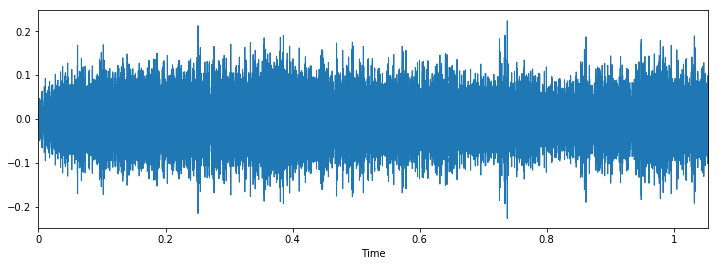

In [0]:
% pylab inline 

plt.figure(figsize=(12, 4))
librosa.display.waveplot(data, sr=16000)

In [45]:
import IPython.display as ipd
ipd.Audio('/content/drive/My Drive/Mivia_Processed_Data/unknown/Copy of background-safe-calm-20190621151417.wav')

In [12]:
import time
import os
from tqdm import tqdm

path = '/content/drive/My Drive/Mivia_Processed_Data/'
lst_X = []
lst_Y = []

start_time = time.time()
processed = []
for subdir, dirs, files in os.walk(path):
  print("Working in ", subdir)
  for file in files:
      try:
        if file.split('_')[-1].split('.')[0] in ['6', '5', '4']:
          print("on ", file)
          X, sample_rate = librosa.load(os.path.join(subdir,file),mono=True, sr=16000)
          file = str(subdir.split('/')[-1])
          pad_len = 16000 - X.shape[0]
          if pad_len  >= 0:
              X= np.pad(X,(0,pad_len),'constant')
          lst_X.append(X[:16000])
          lst_Y.append(file)
        elif subdir == str(path + 'unknown'):
          print("on ", file)
          X, sample_rate = librosa.load(os.path.join(subdir,file),mono=True, sr=16000)
          file = str(subdir.split('/')[-1])
          pad_len = 16000 - X.shape[0]
          if pad_len  >= 0:
              X= np.pad(X,(0,pad_len),'constant')
          lst_X.append(X[:16000])
          lst_Y.append(file)  
        else:
          continue
      # If the file is not valid, skip it
      except ValueError:
        continue

print("--- Data loaded. Loading time: %s seconds ---" % (time.time() - start_time))

Working in  /content/drive/My Drive/Mivia_Processed_Data/
Working in  /content/drive/My Drive/Mivia_Processed_Data/glass
on  glass_00061_28_4.wav
on  glass_00061_28_5.wav
on  glass_00061_28_6.wav
on  glass_00061_30_4.wav
on  glass_00061_30_5.wav
on  glass_00061_30_6.wav
on  glass_00062_0_4.wav
on  glass_00062_0_5.wav
on  glass_00062_0_6.wav
on  glass_00062_1_4.wav
on  glass_00062_1_5.wav
on  glass_00062_1_6.wav
on  glass_00062_5_4.wav
on  glass_00062_5_5.wav
on  glass_00062_5_6.wav
on  glass_00062_9_4.wav
on  glass_00062_9_5.wav
on  glass_00062_9_6.wav
on  glass_00062_21_4.wav
on  glass_00062_21_5.wav
on  glass_00062_21_6.wav
on  glass_00062_23_4.wav
on  glass_00062_23_5.wav
on  glass_00062_23_6.wav
on  glass_00062_26_4.wav
on  glass_00062_26_5.wav
on  glass_00062_26_6.wav
on  glass_00063_1_4.wav
on  glass_00063_1_5.wav
on  glass_00063_1_6.wav
on  glass_00063_4_4.wav
on  glass_00063_4_5.wav
on  glass_00063_4_6.wav
on  glass_00063_5_4.wav
on  glass_00063_5_5.wav
on  glass_00063_5_6.wav


In [0]:
len(lst_X)

7838

In [0]:
lst_Y[-1]

'unknown'

In [0]:
cls_dict = {'glass': 0, 'gunshots': 1, 'screams': 2, 'unknown': 3}
inv_cls_dict = {v: k for k, v in cls_dict.items()}
Y = np.array([cls_dict[i] for i in lst_Y])

X = np.asarray(lst_X)

In [19]:
np.unique(Y)

array([0, 1, 2, 3])

In [0]:
import joblib

X_name = 'X.joblib'
Y_name = 'Y.joblib'
save_dir = '/content/drive/My Drive/Mivia-Saved'

savedX = joblib.dump(X, os.path.join(save_dir, X_name))
savedy = joblib.dump(Y, os.path.join(save_dir, Y_name))

In [0]:
X = joblib.load('/content/drive/My Drive/Mivia-Saved/X.joblib')
Y = joblib.load('/content/drive/My Drive/Mivia-Saved/Y.joblib')

In [21]:
print("X: ", X.shape)
print("Y: ", Y.shape)

X:  (7838, 16000)
Y:  (7838,)


In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

In [0]:
from sklearn.utils import class_weight
class_weights = class_weight.compute_sample_weight('balanced',
                                                 np.unique(Y_train),
                                                 Y_train)

In [23]:
print("X_train: ", X_train.shape)
print("Y_train: ", Y_train.shape)

X_train:  (6270, 16000)
Y_train:  (6270,)


In [24]:
Y_train

array([2, 2, 1, ..., 0, 3, 3])

In [25]:
x_train = X_train.reshape(X_train.shape[0], 1, 16000)
x_test = X_test.reshape(X_test.shape[0], 1, 16000)
print("x_train: ", x_train.shape)
print("x_test: ", x_test.shape)

x_train:  (6270, 1, 16000)
x_test:  (1568, 1, 16000)


In [26]:
from keras.utils.np_utils import to_categorical
y_train, y_test = to_categorical(Y_train), to_categorical(Y_test)
print("y_train: ", y_train.shape)
print("y_test: ", y_test.shape)

y_train:  (6270, 4)
y_test:  (1568, 4)


Using TensorFlow backend.


In [0]:
# max_ = 0
# count = 0
# for i in range(x_train.shape[0]):
#   if len(x_train[i]) > 0: count += 1
#   if len(x_train[i]) > max_: max_ = len(x_train[i])

# print("max: ", max_)
# print("count: ", count)

In [0]:
from keras.optimizers import Optimizer
from keras import backend as K
import six
import copy
from six.moves import zip
from keras.utils.generic_utils import serialize_keras_object
from keras.utils.generic_utils import deserialize_keras_object
from keras.legacy import interfaces

class AdamW(Optimizer):
    """Adam optimizer.
    Default parameters follow those provided in the original paper.
    # Arguments
        lr: float >= 0. Learning rate.
        beta_1: float, 0 < beta < 1. Generally close to 1.
        beta_2: float, 0 < beta < 1. Generally close to 1.
        epsilon: float >= 0. Fuzz factor.
        decay: float >= 0. Learning rate decay over each update.
        weight_decay: float >= 0. Decoupled weight decay over each update.
    # References
        - [Adam - A Method for Stochastic Optimization](http://arxiv.org/abs/1412.6980v8)
        - [Optimization for Deep Learning Highlights in 2017](http://ruder.io/deep-learning-optimization-2017/index.html)
        - [Fixing Weight Decay Regularization in Adam](https://arxiv.org/abs/1711.05101)
    """

    def __init__(self, lr=0.001, beta_1=0.9, beta_2=0.999, weight_decay=1e-4,  # decoupled weight decay (1/6)
                 epsilon=1e-8, decay=0., **kwargs):
        super(AdamW, self).__init__(**kwargs)
        with K.name_scope(self.__class__.__name__):
            self.iterations = K.variable(0, dtype='int64', name='iterations')
            self.lr = K.variable(lr, name='lr')
            self.init_lr = lr # decoupled weight decay (2/6)
            self.beta_1 = K.variable(beta_1, name='beta_1')
            self.beta_2 = K.variable(beta_2, name='beta_2')
            self.decay = K.variable(decay, name='decay')
            self.wd = K.variable(weight_decay, name='weight_decay') # decoupled weight decay (3/6)
        self.epsilon = epsilon
        self.initial_decay = decay

    @interfaces.legacy_get_updates_support
    def get_updates(self, loss, params):
        grads = self.get_gradients(loss, params)
        self.updates = [K.update_add(self.iterations, 1)]
        wd = self.wd # decoupled weight decay (4/6)

        lr = self.lr
        if self.initial_decay > 0:
            lr *= (1. / (1. + self.decay * K.cast(self.iterations,
                                                  K.dtype(self.decay))))
        eta_t = lr / self.init_lr # decoupled weight decay (5/6)

        t = K.cast(self.iterations, K.floatx()) + 1
        lr_t = lr * (K.sqrt(1. - K.pow(self.beta_2, t)) /
                     (1. - K.pow(self.beta_1, t)))

        ms = [K.zeros(K.int_shape(p), dtype=K.dtype(p)) for p in params]
        vs = [K.zeros(K.int_shape(p), dtype=K.dtype(p)) for p in params]
        self.weights = [self.iterations] + ms + vs

        for p, g, m, v in zip(params, grads, ms, vs):
            m_t = (self.beta_1 * m) + (1. - self.beta_1) * g
            v_t = (self.beta_2 * v) + (1. - self.beta_2) * K.square(g)
            p_t = p - lr_t * m_t / (K.sqrt(v_t) + self.epsilon) - eta_t * wd * p # decoupled weight decay (6/6)

            self.updates.append(K.update(m, m_t))
            self.updates.append(K.update(v, v_t))
            new_p = p_t

            # Apply constraints.
            if getattr(p, 'constraint', None) is not None:
                new_p = p.constraint(new_p)

            self.updates.append(K.update(p, new_p))
        return self.updates

    def get_config(self):
        config = {'lr': float(K.get_value(self.lr)),
                  'beta_1': float(K.get_value(self.beta_1)),
                  'beta_2': float(K.get_value(self.beta_2)),
                  'decay': float(K.get_value(self.decay)),
                  'weight_decay': float(K.get_value(self.wd)),
                  'epsilon': self.epsilon}
        base_config = super(AdamW, self).get_config()
        return dict(list(base_config.items()) + list(config.items()))

In [0]:
from keras.layers import Input, Conv2D, Activation, GlobalAvgPool2D, Dense, BatchNormalization

def get_cnn():
    inputs = l = Input((1, 16000), name='input')
    l = Melspectrogram(n_dft=512, n_hop=512, input_shape=input_shape,
                         padding='same', sr=sr, n_mels=128,
                         fmin=0.0, fmax=sr/2, power_melgram=1.0,
                         return_decibel_melgram=False, trainable_fb=False,
                         trainable_kernel=False,
                         name='trainable_stft')(l)
    # Maybe some additive white noise.
    l = AdditiveNoise(power=0.2)(l)
    # If you wanna normalise it per-frequency
    l = Normalization2D(str_axis='freq')(l)
    # conv11
    l = Conv2D(32, (3, 3), padding='same', name='conv11')(l)
    l = Activation('relu', name='conv11_relu')(l)
    l = BatchNormalization(name='conv11_bn')(l)

    # conv12
    l = Conv2D(64, (3, 3), padding='same', strides=(2, 2), name='conv12')(l)
    l = Activation('relu', name='conv12_relu')(l)
    l = BatchNormalization(name='conv12_bn')(l)

    # conv21
    l = Conv2D(128, (3, 3), padding='same', name='conv21')(l)
    l = Activation('relu', name='conv21_relu')(l)
    l = BatchNormalization(name='conv21_bn')(l)

    # conv22
    l = Conv2D(128, (3, 3), padding='same', strides=(2, 2), name='conv22')(l)
    l = Activation('relu', name='conv22_relu')(l)
    l = BatchNormalization(name='conv22_bn')(l)

    # out
    l = GlobalAvgPool2D(name='avg_pool')(l)
    l = Dense(4, name='fc1')(l)
    outputs = l = Activation('softmax', name='out')(l)

    return inputs, outputs
  
inputs, outputs = get_cnn()
model = Model(inputs=inputs, outputs=outputs)

In [53]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding, AveragePooling2D, BatchNormalization
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv2D, MaxPooling2D
from kapre.filterbank import Filterbank
from keras.models import Model
from keras.callbacks import ModelCheckpoint
import kapre
from kapre.time_frequency import Melspectrogram,Spectrogram
from kapre.utils import Normalization2D
from kapre.augmentation import AdditiveNoise

input_shape = (1, 16000)
sr = 16000

model = Sequential()
model.add(Melspectrogram(n_dft=512, n_hop=512, input_shape=input_shape,
                         padding='same', sr=sr, n_mels=128,
                         fmin=0.0, fmax=sr/2, power_melgram=1.0,
                         return_decibel_melgram=False, trainable_fb=False,
                         trainable_kernel=False,
                         name='trainable_stft'))
# Maybe some additive white noise.
model.add(AdditiveNoise(power=0.2))
# If you wanna normalise it per-frequency
model.add(Normalization2D(str_axis='freq'))
model.add(Conv2D(30, kernel_size=(3, 3), activation='relu'))

model.add(Conv2D(8, kernel_size=(3, 3), activation='relu',dim_ordering="th"))
model.add(Conv2D(30, kernel_size=(3, 3), activation='relu',dim_ordering="th"))
model.add(Conv2D(9, kernel_size=(3, 3), activation='relu',dim_ordering="th"))
model.add(Conv2D(30, kernel_size=(3, 3), activation='relu',dim_ordering="th"))
model.add(Conv2D(11, kernel_size=(3, 3), activation='relu',dim_ordering="th"))
model.add(Conv2D(30, kernel_size=(3, 3), activation='relu',dim_ordering="th"))
model.add(Conv2D(10, kernel_size=(3, 3), activation='relu',dim_ordering="th"))
model.add(Conv2D(30, kernel_size=(3, 3), activation='relu',dim_ordering="th"))
model.add(Conv2D(8, kernel_size=(3, 3), activation='relu',dim_ordering="th"))
model.add(Conv2D(30, kernel_size=(3, 3), activation='relu',dim_ordering="th"))
model.add(Conv2D(11, kernel_size=(3, 3), activation='relu',dim_ordering="th"))
model.add(Conv2D(30, kernel_size=(3, 3), activation='relu',dim_ordering="th"))
model.add(Conv2D(45, kernel_size=(3, 3), activation='relu',dim_ordering="th"))
model.add(AveragePooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(4, activation='softmax'))
model.summary()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(8, kernel_size=(3, 3), activation="relu", data_format="channels_first")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(30, kernel_size=(3, 3), activation="relu", data_format="channels_first")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:34: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(9, kernel_size=(3, 3), activation="relu", data_format="channels_first")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:35: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(30, kernel_size=(3, 3), activation="relu", data_format="channels_first")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:36: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(11, kernel_size=(3, 3), activation="relu", dat

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
trainable_stft (Melspectrogr (None, 128, 32, 1)        296064    
_________________________________________________________________
additive_noise_4 (AdditiveNo (None, 128, 32, 1)        0         
_________________________________________________________________
normalization2d_4 (Normaliza (None, 128, 32, 1)        0         
_________________________________________________________________
conv2d_43 (Conv2D)           (None, 126, 30, 30)       300       
_________________________________________________________________
conv2d_44 (Conv2D)           (None, 8, 28, 28)         9080      
_________________________________________________________________
conv2d_45 (Conv2D)           (None, 30, 26, 26)        2190      
_________________________________________________________________
conv2d_46 (Conv2D)           (None, 9, 24, 24)         2439      
__________

In [0]:
opt = keras.optimizers.adam()
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=opt,metrics=['accuracy'])

In [67]:
model.fit(x_train, y_train, batch_size=10, epochs=10, validation_data=(x_test, y_test))

Train on 6270 samples, validate on 1568 samples
Epoch 1/10
6270/6270 [==============================] - 16s 3ms/step - loss: 0.2890 - acc: 0.9080 - val_loss: 1.5590 - val_acc: 0.7060
Epoch 2/10
6270/6270 [==============================] - 14s 2ms/step - loss: 0.1604 - acc: 0.9494 - val_loss: 6.5552 - val_acc: 0.4375
Epoch 3/10
6270/6270 [==============================] - 14s 2ms/step - loss: 0.1101 - acc: 0.9671 - val_loss: 3.4908 - val_acc: 0.6518
Epoch 4/10
6270/6270 [==============================] - 14s 2ms/step - loss: 0.0944 - acc: 0.9700 - val_loss: 9.3653 - val_acc: 0.3540
Epoch 5/10
6270/6270 [==============================] - 14s 2ms/step - loss: 0.0799 - acc: 0.9745 - val_loss: 6.4851 - val_acc: 0.4630
Epoch 6/10
6270/6270 [==============================] - 14s 2ms/step - loss: 0.0751 - acc: 0.9769 - val_loss: 6.9953 - val_acc: 0.4094
Epoch 7/10
6270/6270 [==============================] - 14s 2ms/step - loss: 0.0640 - acc: 0.9813 - val_loss: 4.7089 - val_acc: 0.5561
Epoch 8

In [68]:
count = 0
preds = model.predict(x_test)
print(preds.shape)
for i in range(y_test.shape[0]):
  if np.argmax(preds[i]) == np.argmax(y_test[i]):
    count += 1
print("correct: ", count)
print("accuracy: ", count/x_test.shape[0])

(1568, 4)
correct:  1195
accuracy:  0.7621173469387755


In [0]:
model.save('/content/drive/My Drive/Mivia-Saved/model.h5')

In [83]:
print("input name: ", model.input.op.name)
print("output shape: ", model.output.op.name)

input name:  input_3
output shape:  out_1/Softmax


In [82]:
test_file, type_ = 'test1.wav', 0

drive.mount('/content/drive')
if type_ == 0:
  data_test, sample_rate = librosa.load('/content/drive/My Drive/Misc/{}'.format(test_file), mono=True, sr=16000)
elif type_ == 1:
  data_test, sample_rate = librosa.load('/content/drive/My Drive/Mivia_Processed_Data/unknown/{}'.format(test_file), mono=True, sr=16000)
else:
  data_test, sample_rate = librosa.load(path + test_file.split('_')[0] + '/' + test_file, mono=True, sr=16000)
pad_len = 16000 - data_test.shape[0]
if pad_len  >= 0:
    data_test = np.pad(data_test, (0, pad_len), 'constant')
data_test = np.array([[data_test[:16000]]])
preds = model.predict(data_test)
inv_cls_dict[np.argmax(preds)]

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


'screams'